In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from pandas import datetime
from datetime import datetime
import datetime as dt


<ipython-input-2-691a957703c1>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [4]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.shape

(541909, 8)

In [8]:
# exploring the unique values of each attribute
print("Number of customers:", data['CustomerID'].nunique())
print("Number of transactions: ", data['InvoiceNo'].nunique())
print("Number of products: ", data['StockCode'].nunique())
print("Number of countries: ", data['Country'].nunique())
print("Number of Description: ", data['Description'].nunique())

Number of customers: 4372
Number of transactions:  25900
Number of products:  4070
Number of countries:  38
Number of Description:  4223


In [9]:
data[data['CustomerID'].isnull()]['InvoiceNo'].nunique()

3710

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
data.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [12]:
data.groupby('InvoiceNo').CustomerID.nunique()

InvoiceNo
536365     1
536366     1
536367     1
536368     1
536369     1
          ..
C581484    1
C581490    1
C581499    1
C581568    1
C581569    1
Name: CustomerID, Length: 25900, dtype: int64

In [13]:
df = data.groupby('InvoiceNo').CustomerID.unique()

In [14]:
data['sales'] = data['Quantity']*data['UnitPrice']

In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
data[data['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [17]:
df.isnull().sum()

0

In [18]:
df.shape

(25900,)

In [19]:
data['CustomerID'] = data.groupby('InvoiceNo')['CustomerID'].ffill().bfill()

In [20]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
sales             0
dtype: int64

In [21]:
data[data.StockCode=='85123A']['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', '?',
       'wrongly marked carton 22804',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

In [22]:
data[data.StockCode==71053]['Description'].unique()

array(['WHITE METAL LANTERN', 'WHITE MOROCCAN METAL LANTERN'],
      dtype=object)

In [23]:
data[data.StockCode=='84029E']['Description'].unique()

array(['RED WOOLLY HOTTIE WHITE HEART.', nan], dtype=object)

In [24]:
data['Description'] = data.groupby('StockCode')['Description'].ffill()

In [25]:
data.isnull().sum()

InvoiceNo        0
StockCode        0
Description    185
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
sales            0
dtype: int64

In [26]:
data['Description'] = data.groupby('StockCode')['Description'].bfill()

In [27]:
data.isnull().sum()

InvoiceNo        0
StockCode        0
Description    112
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
sales            0
dtype: int64

# RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

# Recency
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [28]:
#last order date available in our dataset
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [30]:
data['date'] = data['InvoiceDate'].dt.date
data[['date']].head()

,date
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01


In [31]:
#group by customers and check last date of purshace
recency_data = data.groupby(by='CustomerID', as_index=False)['date'].max()
recency_data.columns = ['CustomerID','LastPurshaceDate']
recency_data.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [32]:
#calculate recency
recency_data['Recency'] = recency_data['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_data.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [33]:
#drop LastPurchaseDate as we don't need it anymore
recency_data.drop('LastPurshaceDate',axis=1,inplace=True)

# Frequency
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [34]:
#calculate frequency of purchases
frequency_data = data.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_data.columns = ['CustomerID','Frequency']
frequency_data.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,183
2,12348.0,31
3,12349.0,74
4,12350.0,17


# Monetary
Monetary attribute answers the question: How much money did the customer spent over time?

In [35]:
monetary_data = data.groupby(by='CustomerID',as_index=False).agg({'sales': 'sum'})
monetary_data.columns = ['CustomerID','Monetary']
monetary_data.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Create RFM Table

In [36]:
#merge recency dataframe with frequency dataframe
temp_data = recency_data.merge(frequency_data,on='CustomerID')
temp_data.head()

,CustomerID,Recency,Frequency
0,12346.0,325,2
1,12347.0,2,183
2,12348.0,75,31
3,12349.0,18,74
4,12350.0,310,17


In [37]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_data = temp_data.merge(monetary_data,on='CustomerID')
#use CustomerID as index
rfm_data.set_index('CustomerID',inplace=True)
#check the head
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,183,4310.00
12348.0,75,31,1797.24
12349.0,18,74,1757.55
12350.0,310,17,334.40


# Applying RFM score formula
The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [38]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.0,18.0,299.505
0.50,50.0,46.0,679.635
0.75,143.0,123.0,1880.655


In [39]:
quantiles.to_dict()

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 18.0, 0.5: 46.0, 0.75: 123.0},
 'Monetary': {0.25: 299.505, 0.5: 679.635, 0.75: 1880.6550000000002}}

### Creation of RFM segmentation table
We will create two segmentation classes since, high recency in not favoulable, while high frequency and monetary value is good.

In [40]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [41]:
#create rfm segmentation table
rfm_segmentation = rfm_data
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [42]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,2,0.00,1,1,1
12347.0,2,183,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,3
12349.0,18,74,1757.55,3,3,3
12350.0,310,17,334.40,1,1,2


In [43]:
rfm_segmentation['RFMGroup'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup
CustomerID,,,,,,,
12346.0,325,2,0.00,1,1,1,111
12347.0,2,183,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,3,223
12349.0,18,74,1757.55,3,3,3,333
12350.0,310,17,334.40,1,1,2,112


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our best customers.

Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

# Applying RMF score:
- Final RFMScore is calculated by assigning weights to individual RFM Quartile
Values, and adding them.
- 0.15*R + 0.30*F + 0.55*M


In [44]:
rfm_segmentation['RFMScore'] = rfm_segmentation['R_Quartile']*0.15+rfm_segmentation['F_Quartile']*0.30+ rfm_segmentation['M_Quartile']*0.55
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,1.00
12347.0,2,183,4310.00,4,4,4,444,4.00
12348.0,75,31,1797.24,2,2,3,223,2.55
12349.0,18,74,1757.55,3,3,3,333,3.00
12350.0,310,17,334.40,1,1,2,112,1.55


In [45]:
rfm_segmentation['RFMScore'].describe()

count    4372.000000
mean        2.499588
std         0.988389
min         1.000000
25%         1.600000
50%         2.450000
75%         3.400000
max         4.000000
Name: RFMScore, dtype: float64

- Below 50 percentile of RFMScore is Low Value Customer
- Above 50, but below 75 percentile of RFMScore is Medium Value
Customer
- Above 75 percentile of RFMScore is High Value Customer
- Range of RFMScore is 1 to 4.

In [46]:
rfm_segmentation['Customer Segment']=np.where(rfm_segmentation['RFMScore'] > 3.40 ,"High Value Customer",(np.where(rfm_segmentation['RFMScore'] < 2.45 , "Low value Customer" ,"Medium Value Customer")))
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,Customer Segment
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,1.00,Low value Customer
12347.0,2,183,4310.00,4,4,4,444,4.00,High Value Customer
12348.0,75,31,1797.24,2,2,3,223,2.55,Medium Value Customer
12349.0,18,74,1757.55,3,3,3,333,3.00,Medium Value Customer
12350.0,310,17,334.40,1,1,2,112,1.55,Low value Customer


In [47]:
rfm_segmentation.drop('RFMGroup',axis=1).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Customer Segment
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,1.00,Low value Customer
12347.0,2,183,4310.00,4,4,4,4.00,High Value Customer
12348.0,75,31,1797.24,2,2,3,2.55,Medium Value Customer
12349.0,18,74,1757.55,3,3,3,3.00,Medium Value Customer
12350.0,310,17,334.40,1,1,2,1.55,Low value Customer


<Figure size 720x432 with 0 Axes>

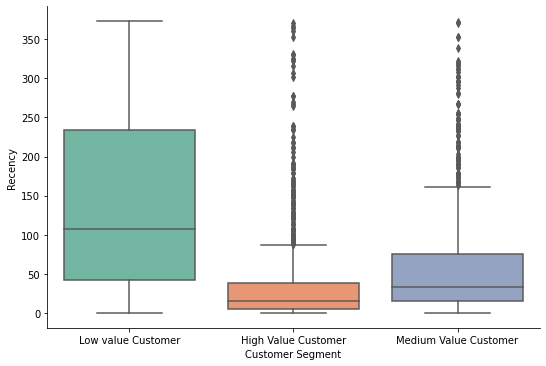

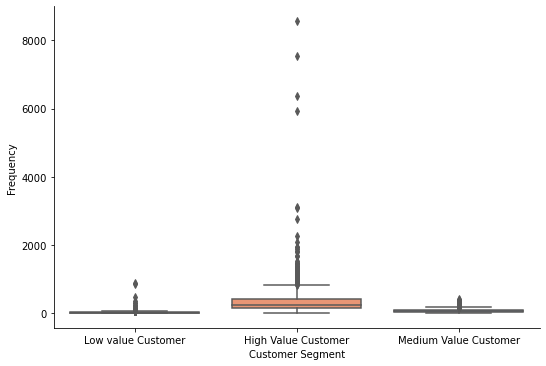

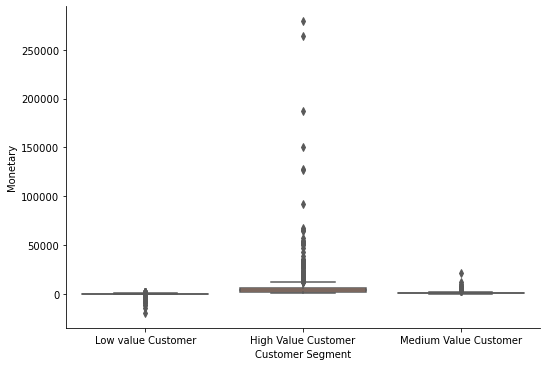

In [48]:
plt.figure(figsize=(10,6))
for i in rfm_segmentation.drop(['R_Quartile','F_Quartile','M_Quartile','RFMGroup','RFMScore','Customer Segment'],axis=1).columns:
    sns.catplot(x='Customer Segment',y=i,data=rfm_segmentation,palette="Set2",kind='box',aspect=1.5)
    plt.show()

In [49]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_segmentation['RFMScore'] = rfm_segmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,Customer Segment
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3,Low value Customer
12347.0,2,183,4310.00,4,4,4,444,12,High Value Customer
12348.0,75,31,1797.24,2,2,3,223,7,Medium Value Customer
12349.0,18,74,1757.55,3,3,3,333,9,Medium Value Customer
12350.0,310,17,334.40,1,1,2,112,4,Low value Customer


In [50]:
rfm_segmentation['RFMScore'].unique()

array([ 3, 12,  7,  9,  4, 10, 11,  6,  8,  5], dtype=int64)

In [51]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Bronze', 'Silver', 'Gold', 'Diamond']
Score_cuts = pd.qcut(rfm_segmentation.RFMScore, q = 4, labels = Loyalty_Level)
rfm_segmentation['RFM_Loyalty_Level'] = Score_cuts.values
rfm_segmentation.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,Customer Segment,RFM_Loyalty_Level
0,12346.0,325,2,0.00,1,1,1,111,3,Low value Customer,Bronze
1,12347.0,2,183,4310.00,4,4,4,444,12,High Value Customer,Diamond
2,12348.0,75,31,1797.24,2,2,3,223,7,Medium Value Customer,Silver
3,12349.0,18,74,1757.55,3,3,3,333,9,Medium Value Customer,Gold
4,12350.0,310,17,334.40,1,1,2,112,4,Low value Customer,Bronze


In [52]:
rfm_segmentation.drop('Customer Segment',axis=1).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3,Bronze
12347.0,2,183,4310.00,4,4,4,444,12,Diamond
12348.0,75,31,1797.24,2,2,3,223,7,Silver
12349.0,18,74,1757.55,3,3,3,333,9,Gold
12350.0,310,17,334.40,1,1,2,112,4,Bronze


In [53]:
rfm_segmentation[rfm_segmentation['RFMGroup']=='444'].sort_values(by='Monetary').head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,Customer Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,
17463.0,16,219,1881.36,4,4,4,444,12,High Value Customer,Diamond
15033.0,4,515,1886.11,4,4,4,444,12,High Value Customer,Diamond
12584.0,3,126,1893.95,4,4,4,444,12,High Value Customer,Diamond
16942.0,12,284,1894.11,4,4,4,444,12,High Value Customer,Diamond
17813.0,14,413,1902.19,4,4,4,444,12,High Value Customer,Diamond
16938.0,8,242,1903.13,4,4,4,444,12,High Value Customer,Diamond
16983.0,12,149,1920.20,4,4,4,444,12,High Value Customer,Diamond
14418.0,3,124,1937.25,4,4,4,444,12,High Value Customer,Diamond
14653.0,1,237,1947.55,4,4,4,444,12,High Value Customer,Diamond


In [54]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMGroup']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMGroup']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMGroup']=='144']))
print('Lost Low Spenders: ',len(rfm_segmentation[rfm_segmentation['RFMGroup']=='111']))

Best Customers:  445
Loyal Customers:  1092
Big Spenders:  1093
Almost Lost:  116
Lost Customers:  58
Lost Low Spenders:  382


Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

At Risk: Send them personalized emails to encourage them to shop.

Conclusion - perspective from this level of customer segmentation To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like k-means clustering, Logistic Regression and Recommendation to produce better informative results on customer behavior.

We will go for k-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement.

# Applying K-means clustering on RFM variables

In [55]:
rfm_data.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,Customer Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3,Low value Customer,Bronze
12347.0,2,183,4310.00,4,4,4,444,12,High Value Customer,Diamond
12348.0,75,31,1797.24,2,2,3,223,7,Medium Value Customer,Silver
12349.0,18,74,1757.55,3,3,3,333,9,Medium Value Customer,Gold
12350.0,310,17,334.40,1,1,2,112,4,Low value Customer,Bronze


In [56]:
rfm_df=rfm_data[['Recency','Frequency','Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,183,4310.00
12348.0,75,31,1797.24
12349.0,18,74,1757.55
12350.0,310,17,334.40


In [57]:
features = rfm_df.columns

In [58]:
features

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

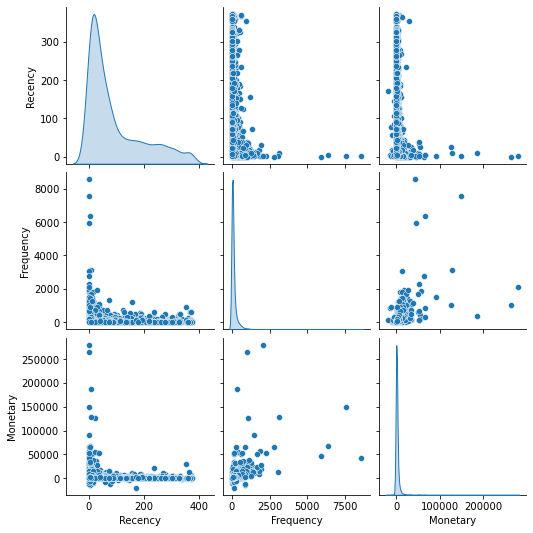

In [59]:
#checking the distribution
sns.pairplot(rfm_df,diag_kind='kde')

In [60]:
#Five Point summary
rfm_df.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.581199,123.949909,2229.585529
std,100.772139,299.774487,8763.265528
min,0.000000,1.000000,-19706.940000
25%,16.000000,18.000000,299.505000
50%,50.000000,46.000000,679.635000
75%,143.000000,123.000000,1880.655000
max,373.000000,8568.000000,279526.400000


In [61]:
rfm_df.skew()

Recency       1.249370
Frequency    14.058826
Monetary     19.256765
dtype: float64

Since K-means is an distance based and features in our RFM table are skewed, we need to Scale and Transform the data

In [62]:
#Power Transformer will scale as well as tranform the data, so we dont need multiple algorithms.
from sklearn.preprocessing import PowerTransformer,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pt = PowerTransformer()
rfm_df = pd.DataFrame(pt.fit_transform(rfm_df))
rfm_df.columns = ['Recency','Frequency','Monetary']
rfm_df.head()

,Recency,Frequency,Monetary
0,1.606608,-2.095203,-0.288744
1,-1.696240,0.975411,0.340420
2,0.317615,-0.297261,0.000047
3,-0.669146,0.328257,-0.005639
4,1.560253,-0.726139,-0.224215


Recency     -0.065453
Frequency    0.001962
Monetary     8.627180
dtype: float64


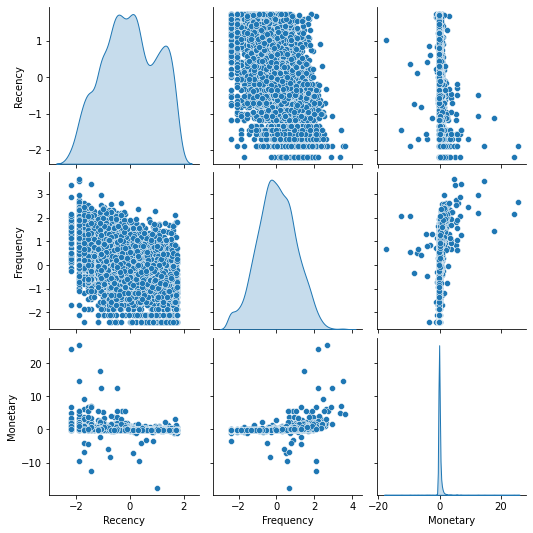

In [63]:
print(rfm_df.skew())
sns.pairplot(rfm_df,diag_kind='kde')

<function matplotlib.pyplot.show(close=None, block=None)>

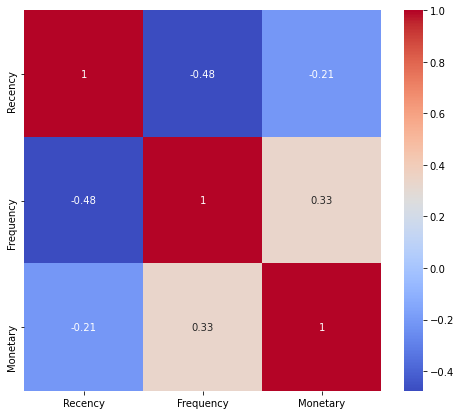

In [64]:
plt.figure(figsize=(8,7))
sns.heatmap(rfm_df.corr(),annot=True,cmap='coolwarm')
plt.show

# K-means Implementation
A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The elbow method can be used to determine the number of clusters as well.

Note: K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called k-means++.

In [65]:
X=rfm_df

In [66]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,13116.000000
1,2,8541.073956
2,3,6635.359780
3,4,5435.007546
4,5,4560.109284
5,6,3832.833851
6,7,3200.414567
7,8,2742.210031
8,9,2400.478249


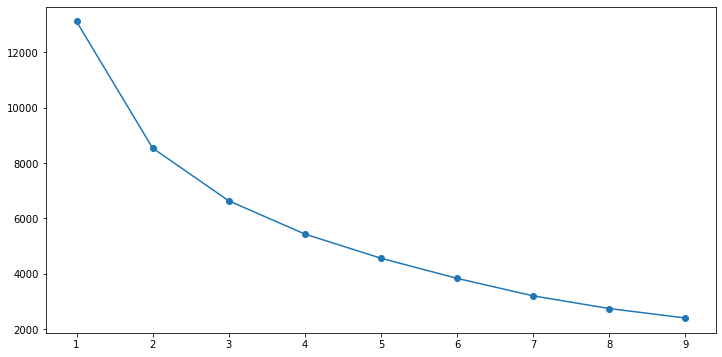

In [67]:
# Elbow plot visualisation to find out optimal number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [68]:
# Number of clusters=2 as we can see a bent in above elpow plot at 2
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print(centroids) # From sci-kit learn

Centroid values
[[ 0.66061192 -0.64819202 -0.22459728]
 [-0.7621444   0.74781562  0.25911666]]


In [69]:
colnames = ["Recency","Frequency","Monetary"]
prediction= kmeans.predict(X)
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction
X_df.head()

,Recency,Frequency,Monetary,group
0,1.606608,-2.095203,-0.288744,0
1,-1.696240,0.975411,0.340420,1
2,0.317615,-0.297261,0.000047,0
3,-0.669146,0.328257,-0.005639,1
4,1.560253,-0.726139,-0.224215,0


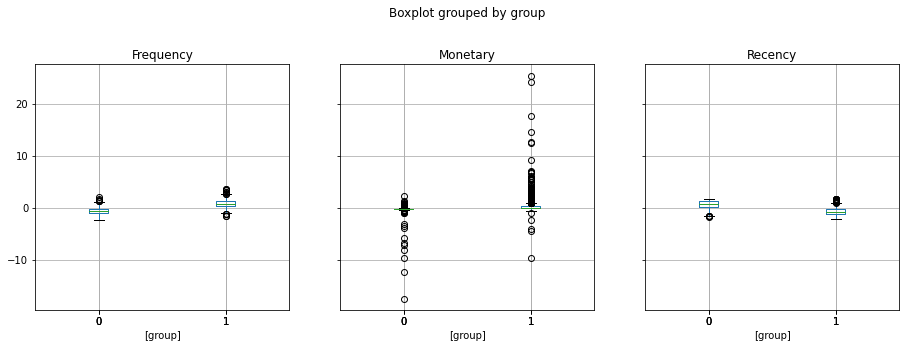

In [70]:
X_df.boxplot(by = 'group',layout=(2,3), figsize=(15, 10))
plt.show()

Customers segmented in group-1 are loyal and comparitively big spenders than those who are segmented in to group-0

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.39171784999631243


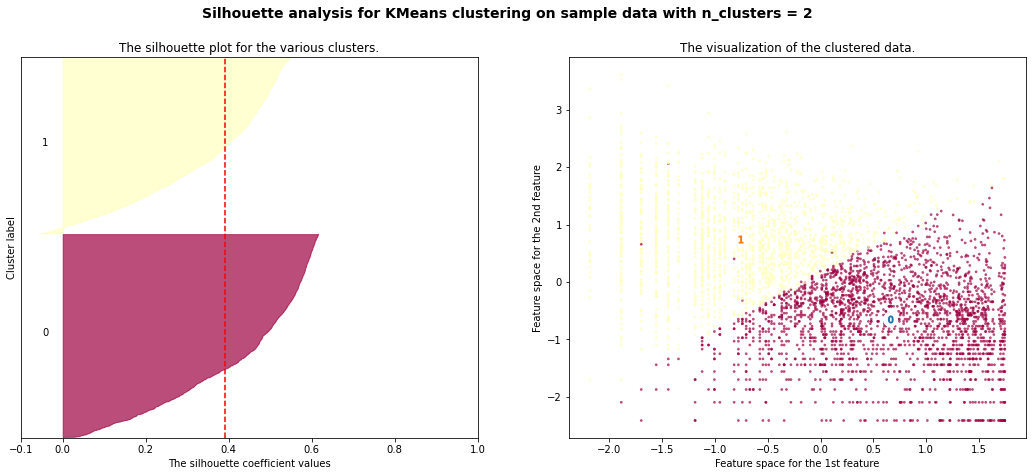

For n_clusters = 3 The average silhouette_score is : 0.39579340444688393


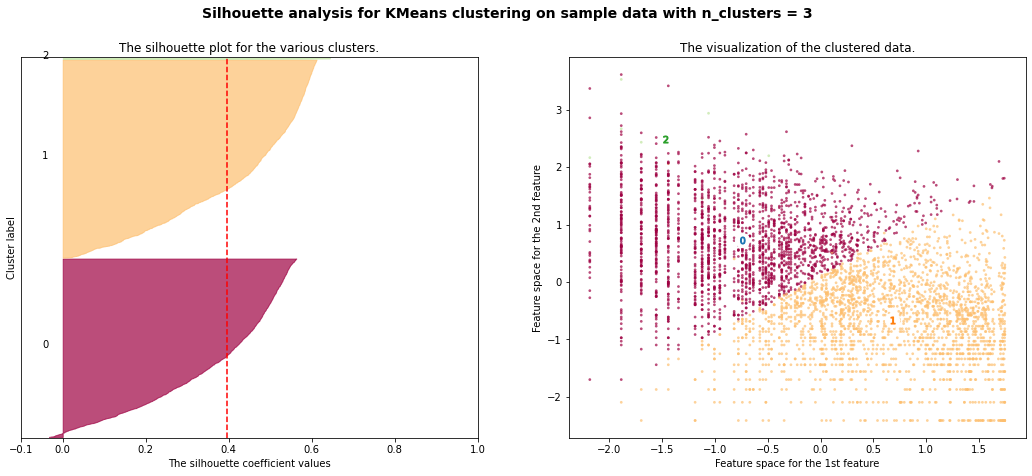

For n_clusters = 4 The average silhouette_score is : 0.31794562734316595


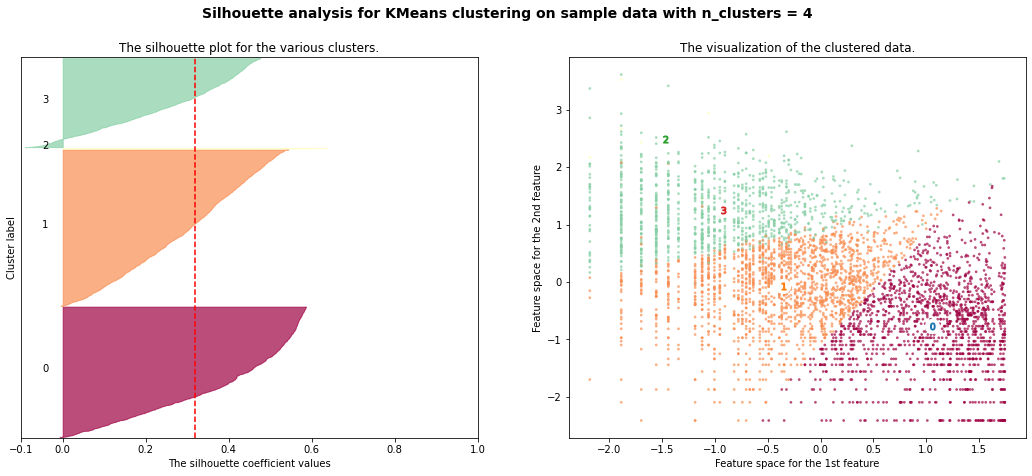

For n_clusters = 5 The average silhouette_score is : 0.3238912258437461


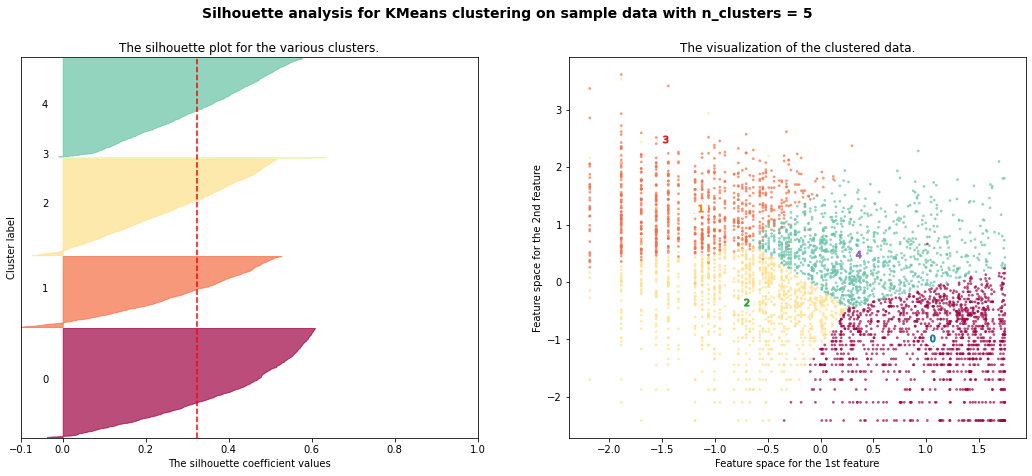

For n_clusters = 6 The average silhouette_score is : 0.3292614826780122


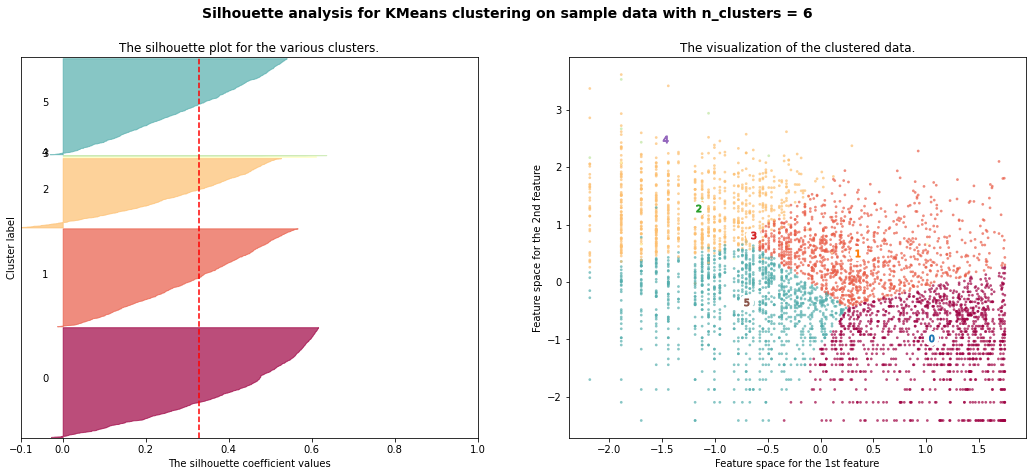

For n_clusters = 7 The average silhouette_score is : 0.3375376035180812


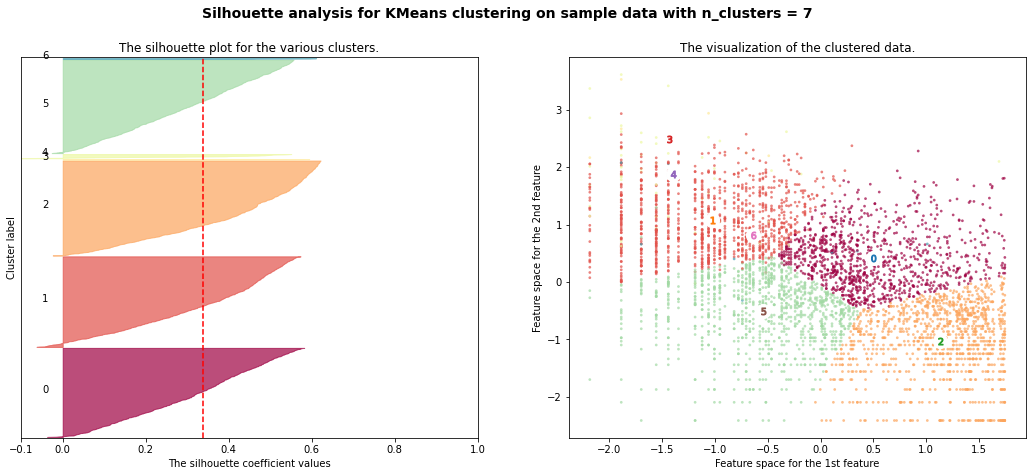

For n_clusters = 8 The average silhouette_score is : 0.3318411531607352


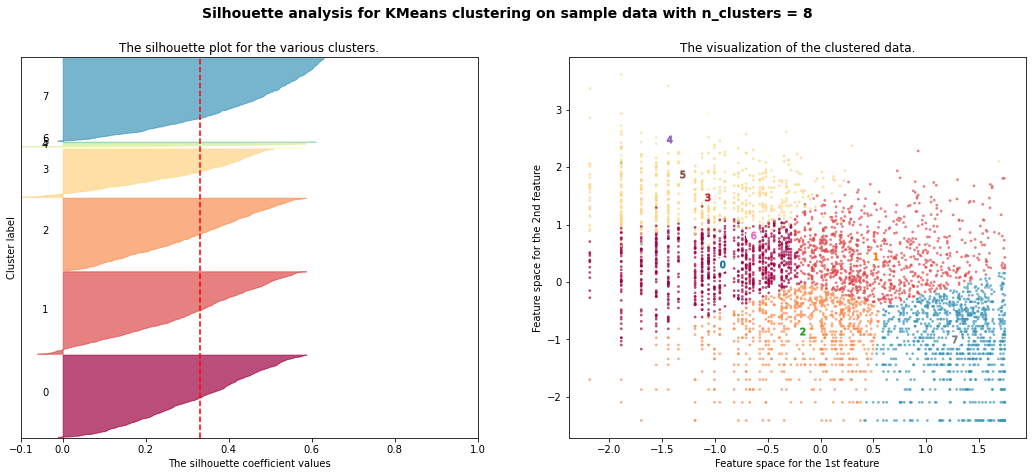

For n_clusters = 9 The average silhouette_score is : 0.3247718380262379


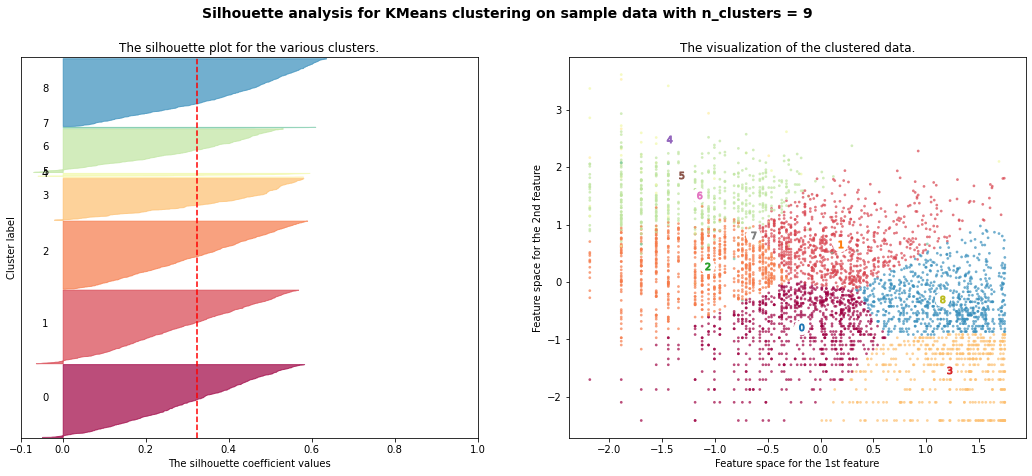

For n_clusters = 10 The average silhouette_score is : 0.31996679030283054


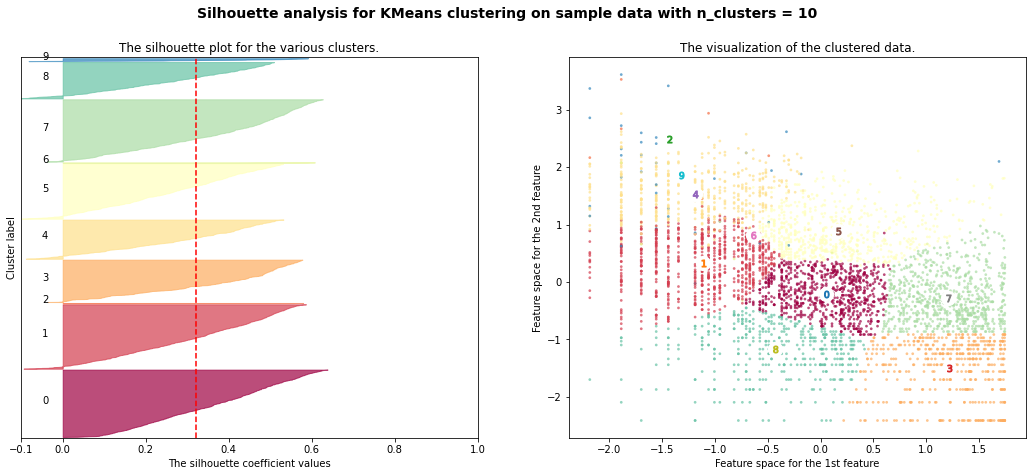

In [71]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [72]:
cluster_df=rfm_segmentation.copy()
cluster_df['group']=X_df['group'].values
cluster_df.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore,Customer Segment,RFM_Loyalty_Level,group
CustomerID,,,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3,Low value Customer,Bronze,0
12347.0,2,183,4310.00,4,4,4,444,12,High Value Customer,Diamond,1
12348.0,75,31,1797.24,2,2,3,223,7,Medium Value Customer,Silver,0
12349.0,18,74,1757.55,3,3,3,333,9,Medium Value Customer,Gold,1
12350.0,310,17,334.40,1,1,2,112,4,Low value Customer,Bronze,0


All customers are now labelled in the thier respective segments/groups

In [73]:
cluster_df['group'].value_counts()

0    2347
1    2025
Name: group, dtype: int64

In [74]:
cluster_df=cluster_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
cluster_df['group'].replace({0:'Regular',1:'Premium'},inplace=True)
cluster_df.head()

,Recency,Frequency,Monetary,RFMGroup,Customer Segment,RFM_Loyalty_Level,group
CustomerID,,,,,,,
12346.0,325,2,0.00,111,Low value Customer,Bronze,Regular
12347.0,2,183,4310.00,444,High Value Customer,Diamond,Premium
12348.0,75,31,1797.24,223,Medium Value Customer,Silver,Regular
12349.0,18,74,1757.55,333,Medium Value Customer,Gold,Premium
12350.0,310,17,334.40,112,Low value Customer,Bronze,Regular


In [75]:
cluster_df.drop(['RFMGroup','Customer Segment','RFM_Loyalty_Level'],axis=1,inplace=True)

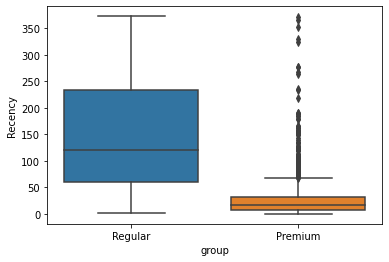

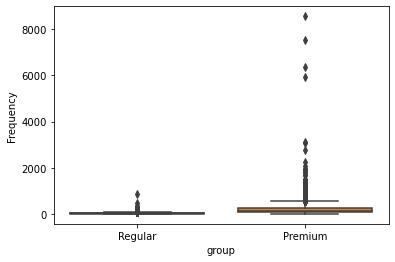

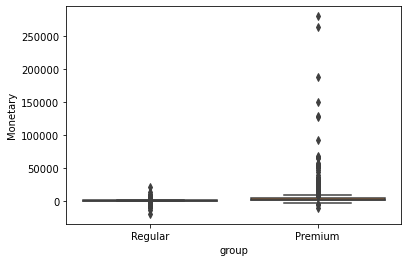

In [76]:
for i in cluster_df.drop('group',axis=1).columns:
    sns.boxplot(x='group',y=i,data=cluster_df)
    plt.show()

# SALES FORECAST USING TIME SERIES FORECASTING

In [77]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [78]:
df = data[['InvoiceDate','sales']]
df.head()

,InvoiceDate,sales
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [79]:
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Week']=df['InvoiceDate'].dt.isocalendar().week
sales_data=pd.DataFrame(df.groupby(['Year','Month','Week'])['sales'].sum())
date = pd.date_range(start='12/1/2010',periods=len(sales_data), freq='W')
sales_data['Time_Stamp'] = date
sales_data.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')

In [80]:
sales_data.head()

,sales
Time_Stamp,
2010-12-05,181847.25
2010-12-12,270287.03
2010-12-19,207052.17
2010-12-26,89770.57
2011-01-02,93720.93


In [81]:
sales_data.describe()

,sales
count,63.000000
mean,154726.157683
std,83936.416677
min,6964.660000
25%,105489.405000
50%,147909.800000
75%,193114.805500
max,380407.570000


<AxesSubplot:xlabel='Time_Stamp'>

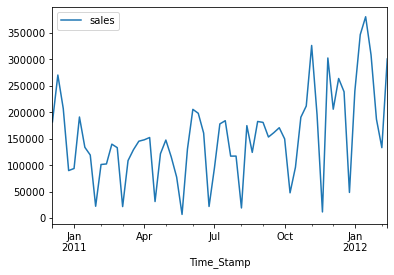

In [82]:
sales_data.plot()

In [83]:
## Test for stationarity of the series - Dicky Fuller test


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    if dfoutput['p-value']<0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

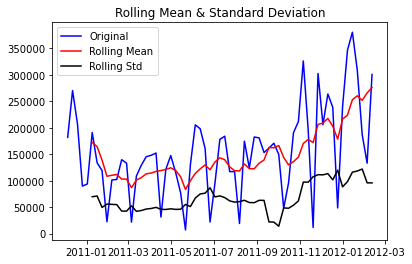

Results of Dickey-Fuller Test:
Test Statistic                  1.202144
p-value                         0.996001
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64 

Time Series is not Stationary


In [84]:
test_stationarity(sales_data['sales'])

Since Data is not stationary, either we need to transform or use differencing to make it stationary

In [85]:
#testing on log transformed data
sales_data['Log_sales']=np.log(sales_data.values)

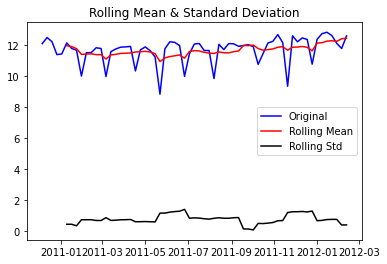

Results of Dickey-Fuller Test:
Test Statistic                 -0.909081
p-value                         0.784967
#Lags Used                      5.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64 

Time Series is not Stationary


In [86]:
test_stationarity(sales_data['Log_sales'])

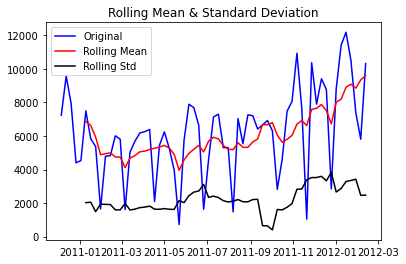

Results of Dickey-Fuller Test:
Test Statistic                  0.935178
p-value                         0.993533
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64 

Time Series is not Stationary


In [87]:
#testing on Boxcox Transformed data
from scipy.stats import boxcox
bxcx=boxcox(sales_data['sales'])
sales_data['BoxCox_sales']=bxcx[0]
test_stationarity(sales_data['BoxCox_sales'])

In [88]:
#Trend Differencing
sales_data['Trend Difference']=sales_data['sales']-sales_data['sales'].shift(1)

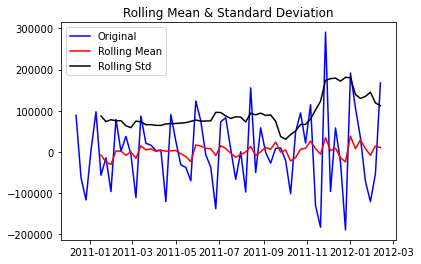

Results of Dickey-Fuller Test:
Test Statistic                 -4.224853
p-value                         0.000598
#Lags Used                      8.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64 

Time Series is Stationary


In [89]:
test_stationarity(sales_data['Trend Difference'].dropna())

In [90]:
sales_data[['Trend Difference']].head()

,Trend Difference
Time_Stamp,
2010-12-05,NaN
2010-12-12,88439.78
2010-12-19,-63234.86
2010-12-26,-117281.60
2011-01-02,3950.36


In [91]:
sales_data[['sales','Trend Difference']]

,sales,Trend Difference
Time_Stamp,,
2010-12-05,181847.25,NaN
2010-12-12,270287.03,88439.78
2010-12-19,207052.17,-63234.86
2010-12-26,89770.57,-117281.60
2011-01-02,93720.93,3950.36
...,...,...
2012-01-15,380407.57,33847.43
2012-01-22,308185.02,-72222.55
2012-01-29,186812.20,-121372.82


In [92]:
# Splitting data into train test
train=sales_data[['Trend Difference']].dropna()[0:42]
test=sales_data[['Trend Difference']].dropna()[42:]

In [93]:
train.head()

,Trend Difference
Time_Stamp,
2010-12-12,88439.78
2010-12-19,-63234.86
2010-12-26,-117281.60
2011-01-02,3950.36
2011-01-09,97274.03


In [94]:
test.head()

,Trend Difference
Time_Stamp,
2011-10-02,-21121.39
2011-10-09,-101844.60
2011-10-16,48301.26
2011-10-23,94453.31
2011-10-30,21209.15


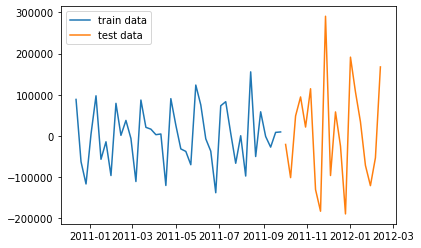

In [95]:
plt.plot(train, label='train data')
plt.plot(test, label='test data')
plt.legend(loc='best')
plt.show()

# AR Model PACF

In [96]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

In [97]:
from statsmodels.tsa.arima_model import ARIMA

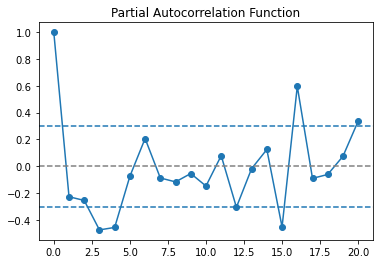

In [98]:
#Plotting PACF
lag_pacf=pacf(train,nlags=20,method='ols')
plt.plot(lag_pacf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--')
plt.title('Partial Autocorrelation Function')
plt.show()

In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [100]:
from sklearn.metrics import mean_absolute_percentage_error

In [101]:
from statsmodels.tsa.stattools import acf

Text(0.5, 1.0, 'Autocorrelation Function')

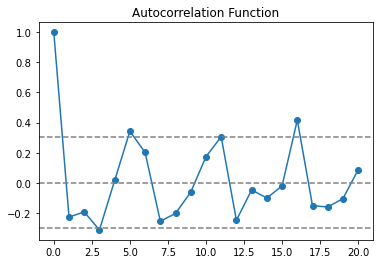

In [102]:
#Plot ACF: 
lag_acf = acf(train, nlags=20)
plt.plot(lag_acf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

values for p,d and q are 1 

In [103]:
model = ARIMA(train, order=(1,1,1))  
results_ARIMA = model.fit()
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Trend Difference   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -517.613
Date:                Wed, 01 Dec 2021   AIC                           1041.226
Time:                        10:00:37   BIC                           1046.366
Sample:                    12-12-2010   HQIC                          1043.098
                         - 09-25-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2060      0.227     -0.907      0.364      -0.651       0.239
ma.L1         -0.9740      0.356     -2.735      0.006      -1.672      -0.276
sigma2      6.935e+09   4.51e-11   1.54e+20      0.000    6.94e+09    6.94e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.80   Prob(JB):                         0.71
Heteroskedasticity (H):               1.01   Skew:                            -0.13
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.48e+35. Standard errors may be unstable.
"""

In [104]:
import pmdarima
arima_model= pmdarima.arima.auto_arima(train,m=12)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -514.837
Date:                Wed, 01 Dec 2021   AIC                           1039.674
Time:                        10:00:42   BIC                           1048.363
Sample:                             0   HQIC                          1042.859
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6345      0.154     -4.131      0.000      -0.936      -0.333
ar.L2         -0.5830      0.153     -3.805      0.000      -0.883      -0.283
ar.L3         -0.7094      0.116     -6.128      0.000      -0.936      -0.483
ar.L4         -0.4700      0.129     -3.653      0.000      -0.722      -0.218
sigma2       2.37e+09    6.1e-12   3.89e+20      0.000    2.37e+09    2.37e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.69   Prob(JB):                         0.26
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.12e+36. Standard errors may be unstable.
"""

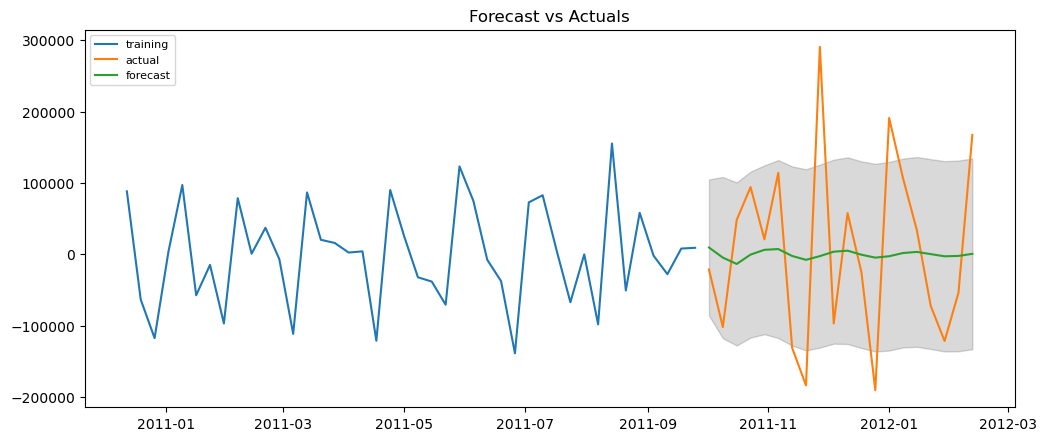

In [105]:
fc, conf=arima_model.predict(n_periods=20,alpha=0.05,return_conf_int=True)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [106]:
mape=mean_absolute_percentage_error(test,fc)
mape

1.000676719801818

In [107]:
predictions_ARIMA_diff = pd.Series(fc, copy=True)
print(predictions_ARIMA_diff.head())

0     9696.081214
1    -4434.970633
2   -13314.978271
3     -219.077257
4     6490.477148
dtype: float64


In [108]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

0    9696.081214
1    5261.110580
2   -8053.867691
3   -8272.944948
4   -1782.467800
dtype: float64


In [109]:
testcum=test.cumsum()

In [110]:
mean_absolute_percentage_error(testcum,predictions_ARIMA_diff_cumsum)

1.0372893599619832